# Data manipulation with Pandas



This week in General Assembly's Data Science immersive course, we got to test our fledgling Python skills against a relatively simple dataset and glean what we could about SAT participation and test scores in 2001.

To do so, I decided to use the pandas library.

I used data from Collegeboard (https://research.collegeboard.org/programs/sat/data/archived/cb-seniors-2001), as well as the ACT site (https://forms.act.org/newsroom/data/2001/data.html).

In [2]:
#import pandas library
import pandas as pd

#read in dataset using pandas.read_csv 
sats = pd.read_csv('sat_scores.csv')

One of the first prompts was to create a list of lists from the data.

In [3]:
#load data into list of lists using df.values.tolist()
sats_list = sats.values.tolist()

##### 5. Print the data

In [4]:
sats_list

[['CT', 82, 509, 510],
 ['NJ', 81, 499, 513],
 ['MA', 79, 511, 515],
 ['NY', 77, 495, 505],
 ['NH', 72, 520, 516],
 ['RI', 71, 501, 499],
 ['PA', 71, 500, 499],
 ['VT', 69, 511, 506],
 ['ME', 69, 506, 500],
 ['VA', 68, 510, 501],
 ['DE', 67, 501, 499],
 ['MD', 65, 508, 510],
 ['NC', 65, 493, 499],
 ['GA', 63, 491, 489],
 ['IN', 60, 499, 501],
 ['SC', 57, 486, 488],
 ['DC', 56, 482, 474],
 ['OR', 55, 526, 526],
 ['FL', 54, 498, 499],
 ['WA', 53, 527, 527],
 ['TX', 53, 493, 499],
 ['HI', 52, 485, 515],
 ['AK', 51, 514, 510],
 ['CA', 51, 498, 517],
 ['AZ', 34, 523, 525],
 ['NV', 33, 509, 515],
 ['CO', 31, 539, 542],
 ['OH', 26, 534, 439],
 ['MT', 23, 539, 539],
 ['WV', 18, 527, 512],
 ['ID', 17, 543, 542],
 ['TN', 13, 562, 553],
 ['NM', 13, 551, 542],
 ['IL', 12, 576, 589],
 ['KY', 12, 550, 550],
 ['WY', 11, 547, 545],
 ['MI', 11, 561, 572],
 ['MN', 9, 580, 589],
 ['KS', 9, 577, 580],
 ['AL', 9, 559, 554],
 ['NE', 8, 562, 568],
 ['OK', 8, 567, 561],
 ['MO', 8, 577, 577],
 ['LA', 7, 564, 5

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [5]:
#use list comprehension to pull values from each column and assign to a list for data. remove the first column (state names, assuming that that's what labels refer to)
sats_data = [sats[x].values.tolist() for x in sats.columns]
sats_data = sats_data[1:]

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [6]:
#call all state names but exclude 'All'
state_names = list(sats.State.values)[:-1]

##### 8. Print the types of each column

In [7]:
sats.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

Because I used pandas, the types were automatically assigned to integers and strings as needed. No need to reassign in this case

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [8]:
#use df.to_dict() to change the dataframe into a dictionary. Specify the column "State" to index to ensure it's the key for each data value/data column 

sats_dict = sats.set_index('State').to_dict()
 
#check dictionary is working
for i in sats_dict:
        print sats_dict["Verbal"]

{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'OK': 567, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'All': 506, 'MA': 511, 'OH': 534, 'UT': 575, 'MO': 577, 'MN': 580, 'MI': 561, 'KS': 577, 'MT': 539, 'MS': 566, 'SC': 486, 'KY': 550, 'OR': 526, 'SD': 577}
{'WA': 527, 'DE': 501, 'DC': 482, 'WI': 584, 'WV': 527, 'HI': 485, 'FL': 498, 'WY': 547, 'NH': 520, 'NJ': 499, 'NM': 551, 'TX': 493, 'LA': 564, 'NC': 493, 'ND': 592, 'NE': 562, 'TN': 562, 'NY': 495, 'PA': 500, 'RI': 501, 'NV': 509, 'VA': 510, 'CO': 539, 'AK': 514, 'AL': 559, 'AR': 562, 'VT': 511, 'IL': 576, 'GA': 491, 'IN': 499, 'IA': 593, 'OK': 567, 'AZ': 523, 'CA': 498, 'ID': 543, 'CT': 509, 'ME': 506, 'MD': 508, 'All': 

##### 11. Create a dictionary with the values for each of the numeric columns

In [9]:
#use the same method as above, but instead transpose the data from the other columns into a list that that is associated with each state ID
num_col = sats.set_index('State').T.to_dict('list')

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [10]:

import numpy as np

def min_max(column_name, string):
    
    print "this is the min for", string, np.min(column_name), "and this is the max for", string, max(column_name)
    
min_max(sats.Math, "maths")
min_max(sats.Verbal, "verbal")
min_max(sats.Rate, "rate")

this is the min for maths 439 and this is the max for maths 603
this is the min for verbal 482 and this is the max for verbal 593
this is the min for rate 4 and this is the max for rate 82


In [11]:
from scipy import stats
def descriptive(column_name, string):
    print "this is the mean, the mode, and the median for", string, np.mean(column_name),",", stats.mode(column_name)[0],",", np.median(column_name)

descriptive(sats.Math, "maths")
descriptive(sats.Verbal, "verbal")
descriptive(sats.Rate, "rate")
All = sats[sats.State == "All"]
All

this is the mean, the mode, and the median for maths 531.5 , [499] , 521.0
this is the mean, the mode, and the median for verbal 532.019230769 , [562] , 526.5
this is the mean, the mode, and the median for rate 37.1538461538 , [4] , 33.5


,State,Rate,Verbal,Math
51,All,45,506,514


The mean is no the same as the amount listed for "All", so I'm going to assume "All" is a weighted average of all states based on participation levels

The min for maths is a lot lower than the min for verbal, but the max for maths is slightly higher.

##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [12]:
import numpy as np

def std_dev(column_name, string):
    print "this is the standard deviation for", string, np.std(column_name)

std_dev(sats.Math,"Math")
std_dev(sats.Verbal,"Verbal")
std_dev(sats.Rate,"Rate")


this is the standard deviation for Math 35.6669961643
this is the standard deviation for Verbal 32.9150949616
this is the standard deviation for Rate 27.0379964945


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

Instead of using pyplot, I decided to use Seaborn

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

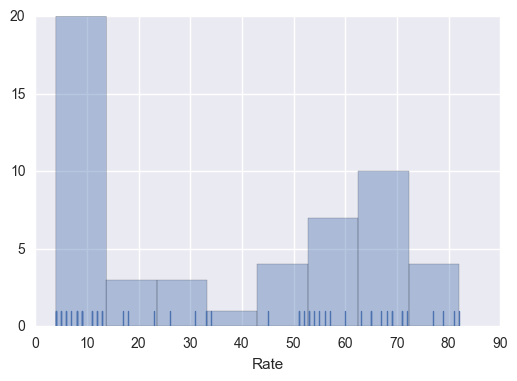

In [14]:
#used rugs instead of a line showing distribution for a better picture on how many states fit into each bin
sns.distplot(sats.Rate, bins=8, kde=False, rug=True)

##### 15. Plot the Math distribution

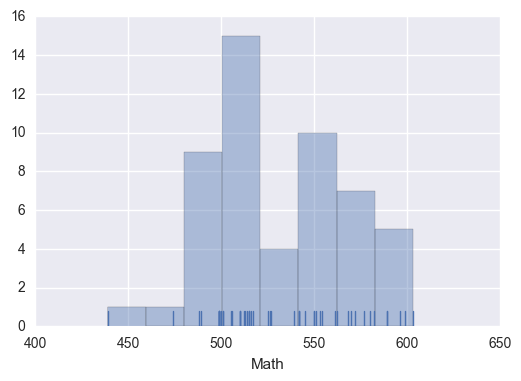

In [15]:
sns.distplot(sats.Math, bins=8, kde=False, rug=True)

##### 16. Plot the Verbal distribution

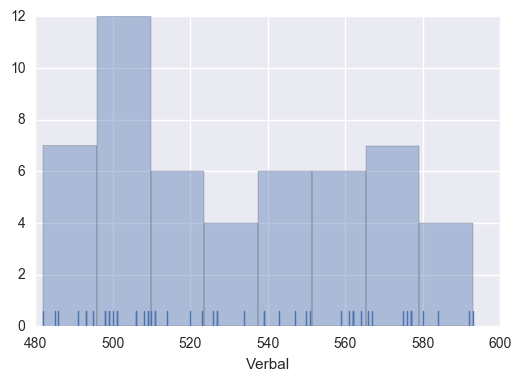

In [16]:
sns.distplot(sats.Verbal, bins=8, kde=False, rug=True)

##### 17. What is the typical assumption for data distribution?

The typical assumption of data distribution is that the data will be normally distributed for cases where the sample size is sufficiently large (aka: larger than 30)

##### 18. Does that distribution hold true for our data?

No. The distribution is not normal

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

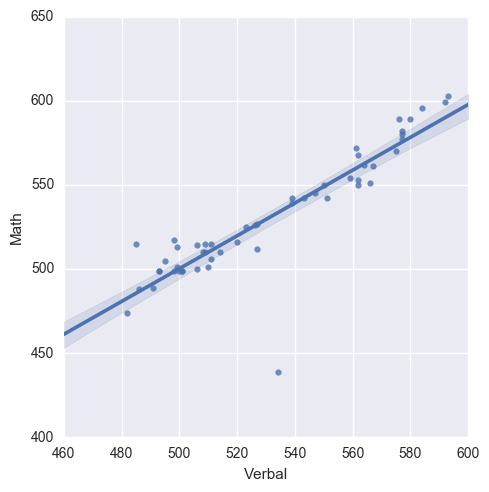

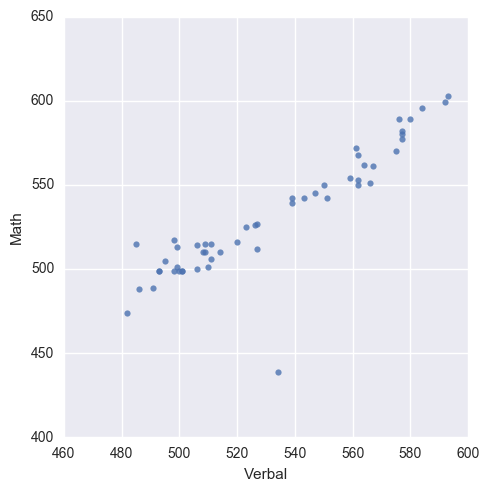

In [17]:
sns.lmplot("Verbal", "Math", data=sats)
plt.savefig('Verbal_math.png')
sns.lmplot("Verbal", "Math", data=sats, fit_reg=False)


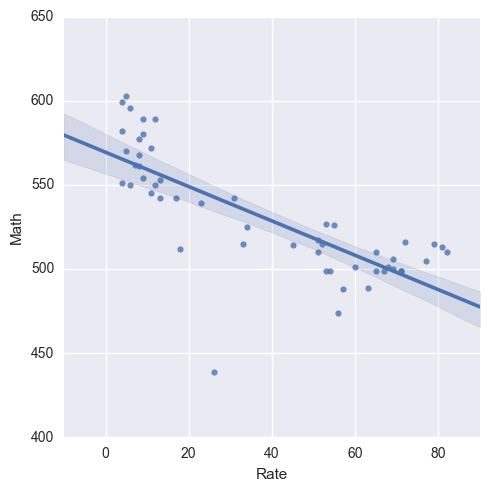

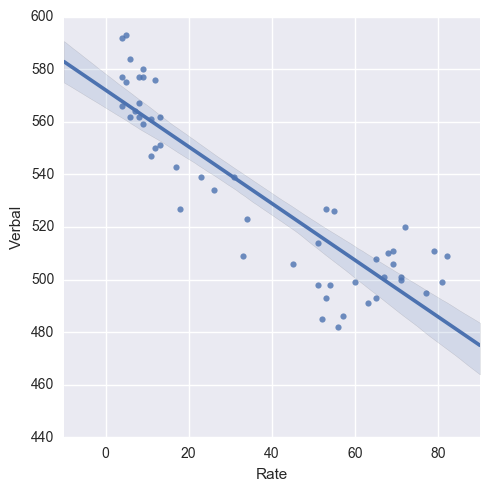

In [18]:
sns.lmplot("Rate", "Math", data=sats)
plt.savefig('Rate_math.png')
sns.lmplot("Rate", "Verbal", data=sats)
plt.savefig('Rate_verbal.png')

In [19]:
#combined verbal and math for a total score
sats["total_score"] = sats.Verbal + sats.Math

sats.head()

,State,Rate,Verbal,Math,total_score
0,CT,82,509,510,1019
1,NJ,81,499,513,1012
2,MA,79,511,515,1026
3,NY,77,495,505,1000
4,NH,72,520,516,1036


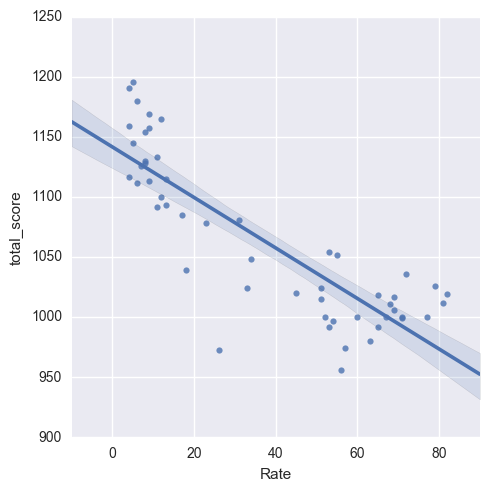

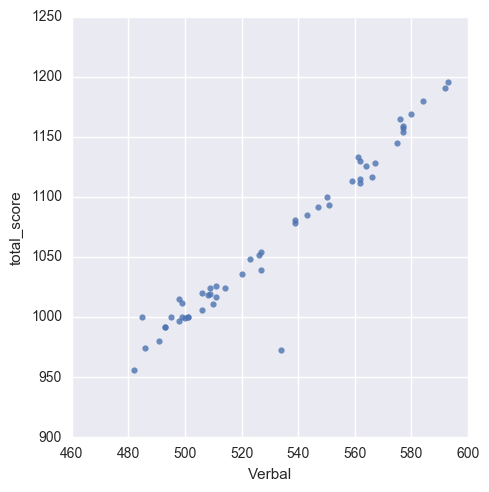

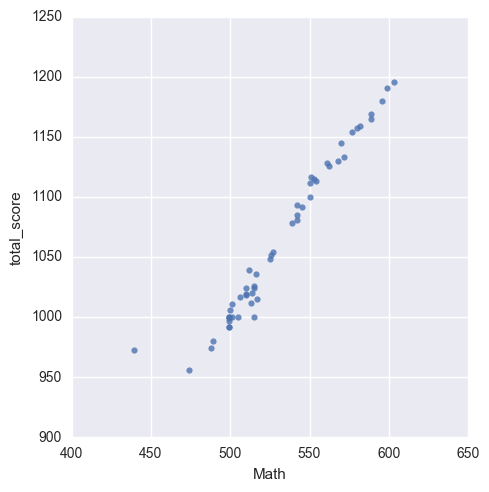

In [20]:
sns.lmplot("Rate", "total_score", data=sats)
plt.savefig('Rate_total.png')
sns.lmplot("Verbal", "total_score", data=sats, fit_reg=False)
sns.lmplot("Math", "total_score", data=sats, fit_reg=False)

##### 20. Are there any interesting relationships to note?

There is a pretty solid relationship between verbal and maths scores: in general, it seems that if a student does well in one, they will do well in the other.

States that have a lower level of participation also seem to do better in general. This is likely because in states with lower participation, the students that are likely to take the SATs are also likely to be the top of their class or students who are college-bound (self-selection)

##### 21. Create box plots for each variable. 

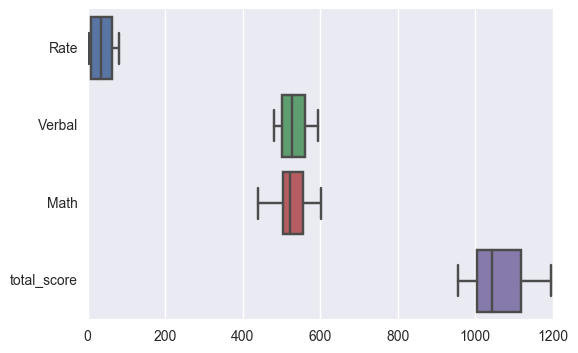

In [21]:
sns.boxplot(data=sats, orient="h")

In [22]:
#create new dataframe to look at boxplots of verbal and maths against each other
scores = sats[["Verbal", "Math"]]

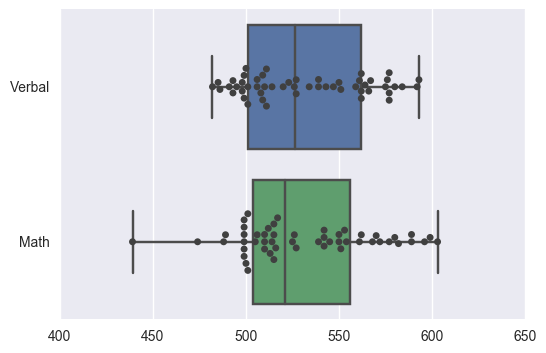

In [23]:
#plus a swarmplot to show distribution of scores in the boxplot
sns.boxplot(data=scores, orient="h")
sns.swarmplot(data=scores, orient="h", color="0.25")

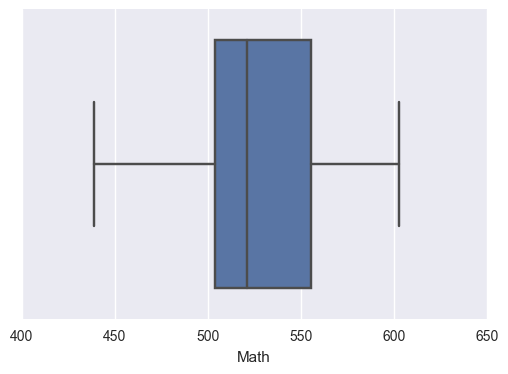

In [24]:
sns.boxplot(sats.Math)

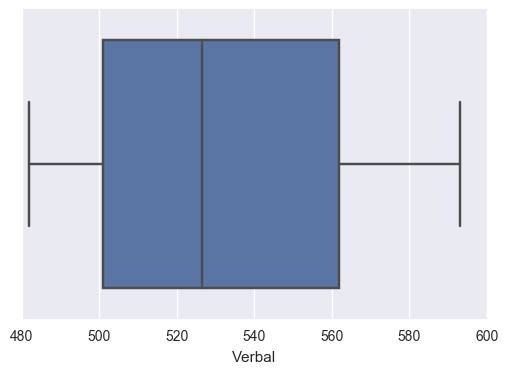

In [25]:
sns.boxplot(sats.Verbal)

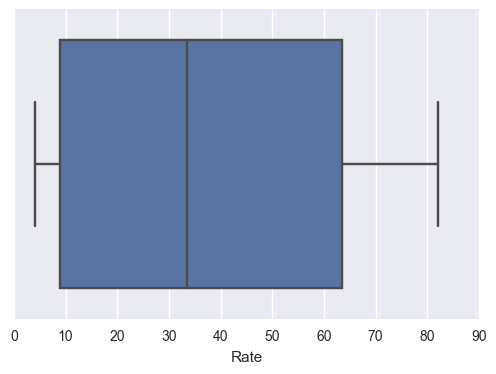

In [26]:
sns.boxplot(sats.Rate)

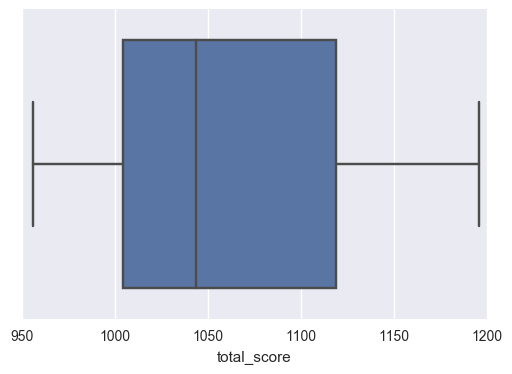

In [27]:
sns.boxplot(sats.total_score)

In [28]:
#there are some states with incredibly low participation so I imported data on ACTs to see if states with low SAT participation had higher ACT participation
act = pd.read_csv("act2001.csv")
sats = sats.sort("State")
print sats
act = act.sort("State")
print act

#used pd.merge to merge on the "State" column which is the column that has similar values
merged_score = pd.merge(left=sats,right=act, left_on='State', right_on='State')

   State  Rate  Verbal  Math  total_score
22    AK    51     514   510         1024
39    AL     9     559   554         1113
45    AR     6     562   550         1112
24    AZ    34     523   525         1048
51   All    45     506   514         1020
23    CA    51     498   517         1015
26    CO    31     539   542         1081
0     CT    82     509   510         1019
16    DC    56     482   474          956
10    DE    67     501   499         1000
18    FL    54     498   499          997
13    GA    63     491   489          980
21    HI    52     485   515         1000
47    IA     5     593   603         1196
30    ID    17     543   542         1085
33    IL    12     576   589         1165
14    IN    60     499   501         1000
38    KS     9     577   580         1157
34    KY    12     550   550         1100
43    LA     7     564   562         1126
2     MA    79     511   515         1026
11    MD    65     508   510         1018
8     ME    69     506   500      

/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/rb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [29]:
#renamed columns with rates of participation to make it easier to understand
print merged_score
merged_score.rename(columns={'Rate': 'sat_rate_of_participation', '% of Graduates Tested*': 'act_rate_of_participation'}, inplace=True)
merged_score.to_csv('merged.csv')

   State  Rate  Verbal  Math  total_score  % of Graduates Tested*  \
0     AK    51     514   510         1024                      34   
1     AL     9     559   554         1113                      69   
2     AR     6     562   550         1112                      75   
3     AZ    34     523   525         1048                      28   
4    All    45     506   514         1020                      38   
5     CA    51     498   517         1015                      12   
6     CO    31     539   542         1081                      62   
7     CT    82     509   510         1019                       4   
8     DC    56     482   474          956                      26   
9     DE    67     501   499         1000                       4   
10    FL    54     498   499          997                      40   
11    GA    63     491   489          980                      19   
12    HI    52     485   515         1000                      19   
13    IA     5     593   603      

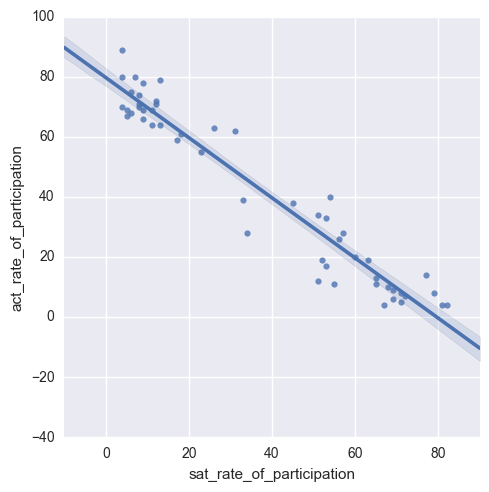

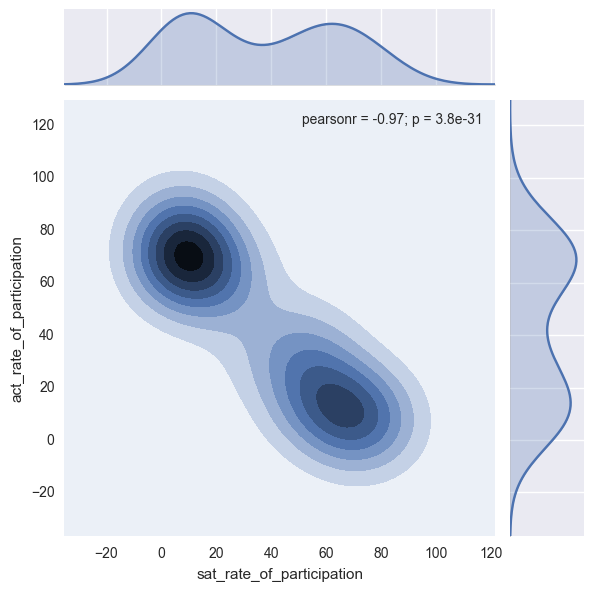

In [30]:
#used a simple line of best fit and a jointplot to examine the relationship between rates of participation in the ACT and SAT. 
#looks like there is an almost perfect negative correlation (pearson's r of -0.97) between ACT and SAT participation rates
sns.lmplot("sat_rate_of_participation", "act_rate_of_participation", data=merged_score)
plt.savefig('sat_act_lmplot.png')
sns.jointplot(x="sat_rate_of_participation", y="act_rate_of_participation", data=merged_score, kind="kde");
plt.savefig('sat_act_joint.png')

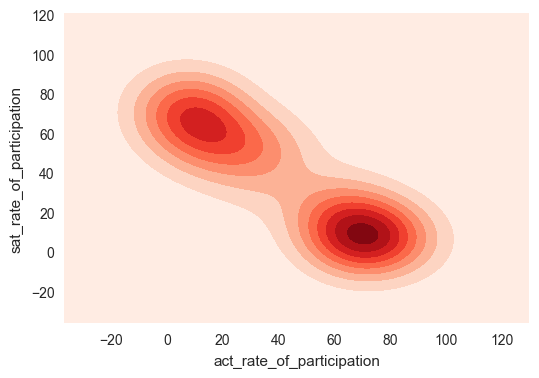

In [31]:
#just for fun I also decided to use a kdeplot and mess around with shades and colours, and flip the variables around
sns.kdeplot(merged_score["act_rate_of_participation"], merged_score["sat_rate_of_participation"], shade=True, cmap="Reds")
plt.savefig('act_sat_kde.png')

To look at the states where Collegeboard should consider investing more money, I decided to look at states with some similarity between SAT and ACT participation

In [32]:
#created a new dataframe with SAT participation between 50% and 20%.
merge_opt = merged_score[(merged_score.sat_rate_of_participation < 50) & (merged_score.sat_rate_of_participation > 20)]

In [33]:
#removed the "All" category for this
merge_opt = merge_opt[(merge_opt.State != "All")]

In [34]:
#print dataframe
merge_opt

,State,sat_rate_of_participation,Verbal,Math,total_score,act_rate_of_participation,Average Composite Score
3,AZ,34,523,525,1048,28,21.5
6,CO,31,539,542,1081,62,21.5
27,MT,23,539,539,1078,55,21.7
34,NV,33,509,515,1024,39,21.3
36,OH,26,534,439,973,63,21.4


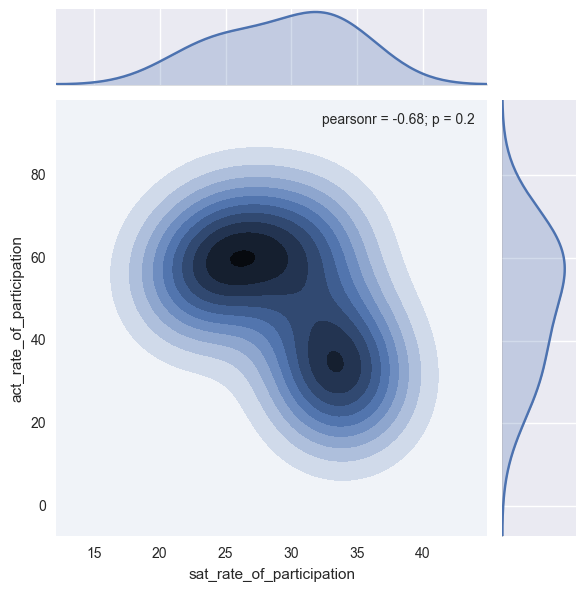

In [35]:
#create a new jointplot to show these "optimal states"
sns.jointplot(x="sat_rate_of_participation", y="act_rate_of_participation", data=merge_opt, kind="kde");
plt.savefig("best_states.png")

# Tableau visuals

I also plotted out a heatmap of participation rates in the SATs and ACTs in each state that you can check out on Tableau

https://public.tableau.com/profile/rb4433#!/vizhome/Standardizedtestparticipationin2001/Dashboard1